In [2]:
import pyphi
import pickle
import glob
import os
import numpy as np
from pathlib import Path
from tqdm import tqdm
# pyphi.config
from pyphi.models.subsystem import FlatCauseEffectStructure as sep
import visualize_pyphi
import networkx as nx
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import prettyphi


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



In [4]:
CES_DIR = Path.cwd()/'example_ces'

# Load CES

## Load subsystem

In [6]:
n_nodes = 5

subsystem_info = prettyphi.utils.load_pickle(CES_DIR / 'system_info.pkl')
subsystem = subsystem_info['subsystem']
n_nodes = len(subsystem.nodes)
subsystem

Subsystem(E, D, C, B, A)

## Load distinctions

In [11]:
# Load only distinctions with contiguous mechanisms
# mechs = list(pyphi.utils.powerset(range(n_nodes),nonempty=True))
# contiguous_mechs = [phiplot.ces_view.node_ixs2label(m, subsystem.node_labels) for m in mechs if phiplot.ces_view.is_contiguous(m)]
# pickles = [p for p in pickles if p.name[2:-4] in contiguous_mechs]

pickles = CES_DIR.glob('d_*.pkl')

distinctions = [prettyphi.utils.load_pickle(p) for p in tqdm(pickles)]
sorted_distinctions = prettyphi.ces.sort_distinctions(distinctions, n_nodes=8)


0it [01:18, ?it/s]

2it [00:00, 10.21it/s]
8it [00:00, 27.13it/s]
12it [00:00, 28.18it/s]
15it [00:00, 26.05it/s]


## Load relations

In [18]:
relations_upto_3 = prettyphi.utils.load_pickle(CES_DIR/'relations_maxdegree_3.pkl')
relations_upto_2 = prettyphi.utils.load_pickle(CES_DIR/'relations_maxdegree_2.pkl')
relations_all = prettyphi.utils.load_pickle(CES_DIR/'relations.pkl')

relations_1 = [r for r in relations_upto_2 if len(r)==1]
relations_2 = [r for r in relations_upto_2 if len(r)==2]
relations_3 = [r for r in relations_upto_3 if len(r)==3]

print(len(relations_all), len(relations_3), len(relations_2))
print(len(relations_upto_3), len(relations_1), len(relations_2), len(relations_3))

1163 190 74
275 11 74 190


## View distinctions

In [12]:
# PLOT ALL MECHS
print(f'[  CAUSE  ] -> (  MECH   ) -> [  EFFECT ]')
print('='*41)
for d in sorted_distinctions:
    print(prettyphi.text.distinction_str(d, pad=True))

[  CAUSE  ] -> (  MECH   ) -> [  EFFECT ]
[E     ] -> (E     ) -> [E     ]
[ D    ] -> ( D    ) -> [ D    ]
[  C   ] -> (  C   ) -> [  C   ]
[   B  ] -> (   B  ) -> [   B  ]
[    A ] -> (    A ) -> [   BA ]
[ D    ] -> (ED    ) -> [E     ]
[  C   ] -> ( DC   ) -> [ D    ]
[   B  ] -> (  CB  ) -> [  C   ]
[    A ] -> (   BA ) -> [   B  ]
[ DC   ] -> (EDC   ) -> [ED    ]
[  CB  ] -> ( DCB  ) -> [ DC   ]
[  CBA ] -> (  CBA ) -> [  CB  ]
[EDCB  ] -> (EDCB  ) -> [EDC   ]
[ DCBA ] -> ( DCBA ) -> [ DCB  ]
[ DCBA ] -> (EDCBA ) -> [EDCB  ]


In [15]:
contiguous_distinctions = [d for d in sorted_distinctions if prettyphi.utils.is_contiguous(d.mechanism)]
n_nodes = 8
print(f'[  CAUSE  ] -> (  MECH   ) -> [  EFFECT ]')
print('='*41)
for d in contiguous_distinctions:
    print(prettyphi.text.distinction_str(d, pad=True))

[  CAUSE  ] -> (  MECH   ) -> [  EFFECT ]
[E     ] -> (E     ) -> [E     ]
[ D    ] -> ( D    ) -> [ D    ]
[  C   ] -> (  C   ) -> [  C   ]
[   B  ] -> (   B  ) -> [   B  ]
[    A ] -> (    A ) -> [   BA ]
[ D    ] -> (ED    ) -> [E     ]
[  C   ] -> ( DC   ) -> [ D    ]
[   B  ] -> (  CB  ) -> [  C   ]
[    A ] -> (   BA ) -> [   B  ]
[ DC   ] -> (EDC   ) -> [ED    ]
[  CB  ] -> ( DCB  ) -> [ DC   ]
[  CBA ] -> (  CBA ) -> [  CB  ]
[EDCB  ] -> (EDCB  ) -> [EDC   ]
[ DCBA ] -> ( DCBA ) -> [ DCB  ]
[ DCBA ] -> (EDCBA ) -> [EDCB  ]


# Plot CES with prettyphi

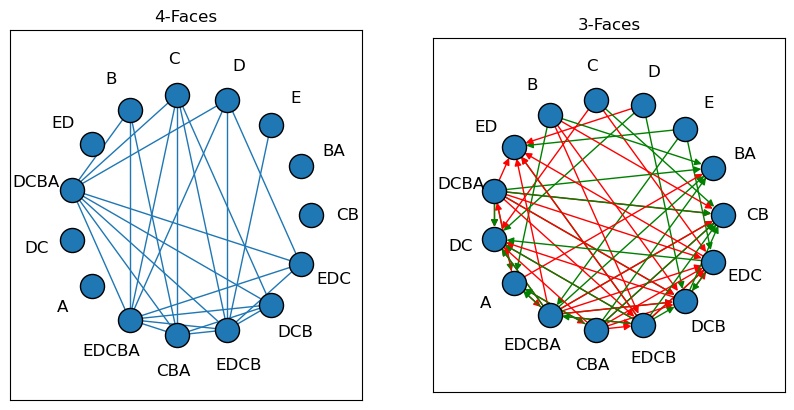

In [20]:
CES = prettyphi.ces.create_ces_graph(distinctions, relations_2)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
pos = nx.layout.circular_layout(CES[3], scale=1)
pos_labels = nx.layout.circular_layout(CES[3], scale=1.3)
# pos_labels = offset_pos(pos, x=0, y=0.15)

ax = axes[0]
ax.set_aspect('equal', adjustable='box')
nx.draw_networkx_nodes(CES[4], pos=pos, ax=ax, edgecolors='k', margins=0.2)
nx.draw_networkx_edges(CES[4], pos=pos, ax=ax, edge_color='tab:blue', )
nx.draw_networkx_labels(CES[4], pos=pos_labels,  ax=ax)

ax.set_title('4-Faces')

ax = axes[1]
ax.set_aspect('equal', adjustable='box')
# nx.draw_circular(CES[3], ax=ax)
nx.draw_networkx_nodes(CES[3], pos=pos, ax=ax, edgecolors='k', margins=0.2)
edge_colors = nx.get_edge_attributes(CES[3], 'color')

nx.draw_networkx_edges(CES[3], pos=pos, ax=ax, edge_color=edge_colors.values())
nx.draw_networkx_labels(CES[3], pos_labels, ax=ax);
edge_labels = nx.get_edge_attributes(CES[3], 'purview')
# nx.draw_networkx_edge_labels(CES[3], pos, edge_labels=edge_labels)

ax.set_title('3-Faces')
plt.savefig('ces_circular.png', dpi=300)

In [21]:
contiguous_distinctions = prettyphi.ces.filter_contiguous_distinctions(distinctions)
contiguous_relations_2 = prettyphi.ces.filter_relations_by_distinctions(relations_2, contiguous_distinctions)

/Users/atopos/Software/anaconda3/envs/iit-4.0/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


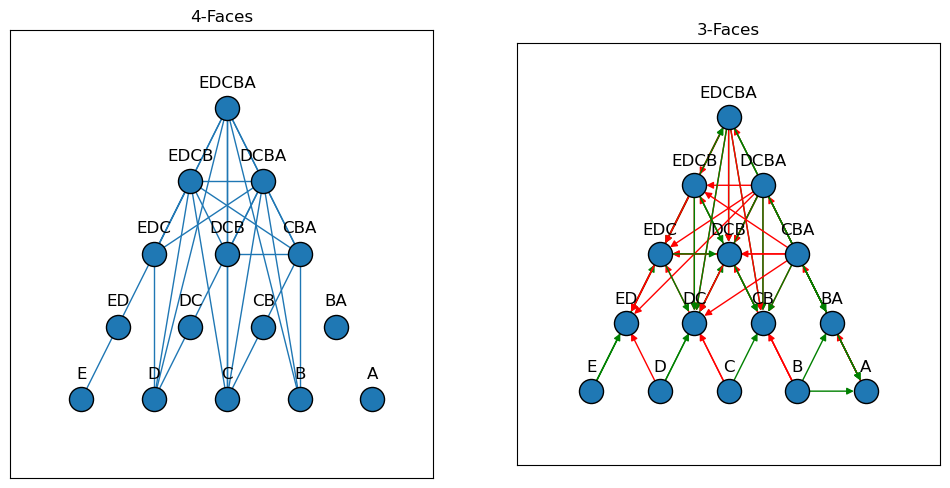

In [22]:
CES = prettyphi.ces.create_ces_graph(contiguous_distinctions, contiguous_relations_2)

fig, axes = plt.subplots(ncols=2, figsize=(12,6))
pos = prettyphi.layout.hasse_layout(5)
pos = {prettyphi.utils.node_ixs2label(mech, subsystem.node_labels) : xy for mech, xy in pos.items()}

pos_labels = prettyphi.layout.offset_pos(pos, x=0, y=0.35)

ax = axes[0]
ax.set_aspect('equal', adjustable='box')
nx.draw_networkx_nodes(CES[4], pos=pos, ax=ax, edgecolors='k', margins=0.2)
nx.draw_networkx_edges(CES[4], pos=pos, ax=ax, edge_color='tab:blue', )
nx.draw_networkx_labels(CES[4], pos=pos_labels,  ax=ax)
ax.set_title('4-Faces')

ax = axes[1]
ax.set_aspect('equal', adjustable='box')
# nx.draw_circular(CES[3], ax=ax)
nx.draw_networkx_nodes(CES[3], pos=pos, ax=ax, edgecolors='k', margins=0.2)
edge_colors = nx.get_edge_attributes(CES[3], 'color')
ax.set_title('3-Faces')

nx.draw_networkx_edges(CES[3], pos=pos, ax=ax, edge_color=edge_colors.values())
nx.draw_networkx_labels(CES[3], pos_labels, ax=ax);
edge_labels = nx.get_edge_attributes(CES[3], 'purview')
# nx.draw_networkx_edge_labels(CES[3], pos, edge_labels=edge_labels)


plt.savefig('ces_hasse.png', dpi=300)

In [ ]:
# # OLD PHIPLOT
# CES = phiplot.ces.CauseEffectStructure(subsystem, contiguous_distinctions)
# phiplot.ces_view.plotly_ces(CES, edge_width=2, show_purview_label=True, save_image_path=None, show_fig=True);